In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import joblib
import tkinter as tk
from tkinter import simpledialog, messagebox

In [3]:
countries = pd.read_csv('/content/drive/MyDrive/countries.csv')
customers = pd.read_csv('/content/drive/MyDrive/customers.csv')
orders = pd.read_csv('/content/drive/MyDrive/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/products.csv')
sales = pd.read_csv('/content/drive/MyDrive/sales.csv')

In [5]:
countries_numeric = countries.select_dtypes(include=['number'])
customers_numeric = customers.select_dtypes(include=['number'])
orders_numeric = orders.select_dtypes(include=['number'])
products_numeric = products.select_dtypes(include=['number'])
sales_numeric = sales.select_dtypes(include=['number'])

customers_with_countries = customers.merge(countries, left_on='Country', right_on='Name', how='left')

customers_with_countries_numeric = customers_with_countries.select_dtypes(include=['number'])

data = sales_numeric.merge(orders_numeric, on='OrderId').merge(customers_with_countries_numeric, on='CustomerId').merge(products_numeric, on='ProductId')


In [9]:
# Remove columns that are entirely NaN from the dataset
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test.dropna(axis=1, how='all')

# Impute missing values in the remaining feature matrix
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train the Linear Regression model
sales_model = LinearRegression()
sales_model.fit(X_train_scaled, y_train)

# Save the model and scaler for later use
joblib.dump(sales_model, 'sales_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(imputer, 'imputer.pkl')  # Save the imputer too

# Test the model
sales_predictions = sales_model.predict(X_test_scaled)
print(f"Sales Prediction Test Results: {sales_predictions[:5]}")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, sales_predictions)
mse = mean_squared_error(y_test, sales_predictions)
r2 = r2_score(y_test, sales_predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Sales Prediction Test Results: [3.5050577  3.50544263 3.5096756  3.49514414 3.512566  ]
Mean Absolute Error: 2.163689037221504
Mean Squared Error: 8.52527179867856
R-squared: -7.877617863627506e-05


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Feature Selection: Remove unnecessary or irrelevant columns
# You can manually choose based on domain knowledge or feature importance later
X = data.drop(columns=['Quantity', 'OrderId', 'ProductId', 'CustomerId'])  # Drop irrelevant columns
y = data['Quantity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the feature matrix
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data (necessary for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train a Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Train a Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Test the models
tree_predictions = tree_model.predict(X_test_scaled)
forest_predictions = forest_model.predict(X_test_scaled)

# Evaluate Decision Tree
mae_tree = mean_absolute_error(y_test, tree_predictions)
mse_tree = mean_squared_error(y_test, tree_predictions)
r2_tree = r2_score(y_test, tree_predictions)

print(f"Decision Tree Results:\n MAE: {mae_tree}\n MSE: {mse_tree}\n R-squared: {r2_tree}\n")

# Evaluate Random Forest
mae_forest = mean_absolute_error(y_test, forest_predictions)
mse_forest = mean_squared_error(y_test, forest_predictions)
r2_forest = r2_score(y_test, forest_predictions)

print(f"Random Forest Results:\n MAE: {mae_forest}\n MSE: {mse_forest}\n R-squared: {r2_forest}\n")

# Save the best performing model
best_model = forest_model if r2_forest > r2_tree else tree_model
joblib.dump(best_model, 'best_sales_model.pkl')


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Population' 'Area (sq. mi.)' 'Pop. Density (per sq. mi.)'
 'Coastline (coast per area ratio)' 'Net migration'
 'Infant mortality (per 1000 births)' 'GDP ($ per capita)' 'Literacy (%)'
 'Phones (per 1000)' 'Arable (%)' 'Crops (%)' 'Other (%)' 'Climate'
 'Birthrate' 'Deathrate' 'Agriculture' 'Industry' 'Service']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Population' 'Area (sq. mi.)' 'Pop. Density (per sq. mi.)'
 'Coastline (coast per area ratio)' 'Net migration'
 'Infant mortality (per 1000 births)' 'GDP ($ per capita)' 'Literacy (%)'
 'Phones (per 1000)' 'Arable (%)' 'Crops (%)' 'Other (%)' 'Climate'
 'Birthrate' 'Deathrate' 'Agriculture' 'Industry' 'Service']. At least one no

Decision Tree Results:
 MAE: 2.9736608224933345
 MSE: 18.04613395814818
 R-squared: -1.1169478217008844

Random Forest Results:
 MAE: 2.3983372384261132
 MSE: 10.746421378363092
 R-squared: -0.2606363989520133



['best_sales_model.pkl']

In [12]:
# Customer Segmentation: Using K-Means Clustering
X_customers = customers_numeric

# Scale the data
scaler_customers = StandardScaler()
X_customers_scaled = scaler_customers.fit_transform(X_customers)

# Train the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume 3 clusters for simplicity
kmeans.fit(X_customers_scaled)

# Save the clustering model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler_customers, 'scaler_customers.pkl')

# Test the model (labels for each customer)
customer_clusters = kmeans.labels_
print(f"Customer Segments: {customer_clusters[:5]}")

import numpy as np

# Check the distribution of customers across clusters
unique, counts = np.unique(customer_clusters, return_counts=True)
print(dict(zip(unique, counts)))


Customer Segments: [2 2 2 2 2]
{0: 134, 1: 134, 2: 132}


SaleId                                    0
OrderId                                   0
ProductId                                 0
Quantity                                  0
CustomerId                                0
Population                            61883
Area (sq. mi.)                        61883
Pop. Density (per sq. mi.)            61883
Coastline (coast per area ratio)      61883
Net migration                         61883
Infant mortality (per 1000 births)    61883
GDP ($ per capita)                    61883
Literacy (%)                          61883
Phones (per 1000)                     61883
Arable (%)                            61883
Crops (%)                             61883
Other (%)                             61883
Climate                               61883
Birthrate                             61883
Deathrate                             61883
Agriculture                           61883
Industry                              61883
Service                         

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Population' 'Area (sq. mi.)' 'Pop. Density (per sq. mi.)'
 'Coastline (coast per area ratio)' 'Net migration'
 'Infant mortality (per 1000 births)' 'GDP ($ per capita)' 'Literacy (%)'
 'Phones (per 1000)' 'Arable (%)' 'Crops (%)' 'Other (%)' 'Climate'
 'Birthrate' 'Deathrate' 'Agriculture' 'Industry' 'Service']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


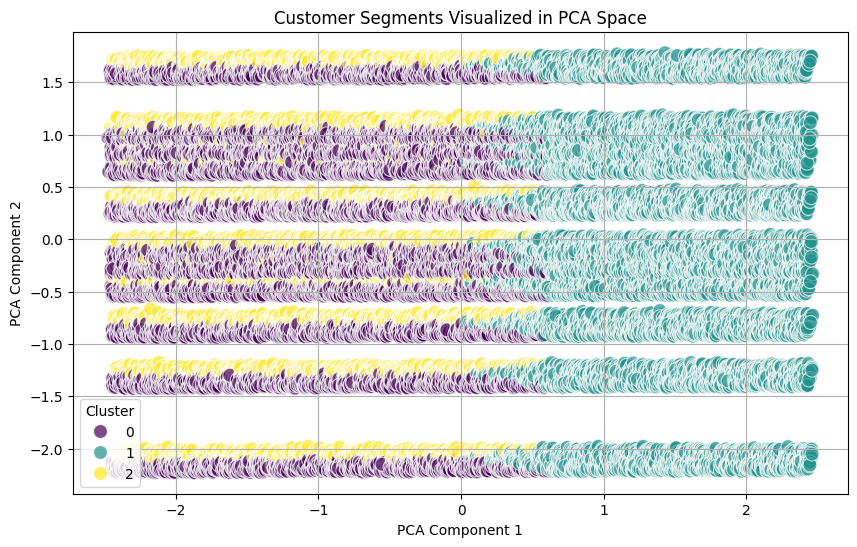

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Check for missing values
print(data.isnull().sum())

# Option 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Scale the imputed data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data for visualization
data['Cluster'] = customer_clusters

# Continue with PCA and visualization...

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for PCA results and cluster labels
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = customer_clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments Visualized in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [13]:
# Define functions to load models and make predictions
def predict_sales():
    try:
        # Load the models
        sales_model = joblib.load('sales_model.pkl')
        scaler = joblib.load('scaler.pkl')

        # Get user input (numeric values)
        user_input = simpledialog.askstring("Input", "Enter numeric features separated by commas (e.g., feature1, feature2, ...):")
        input_data = [float(x) for x in user_input.split(',')]

        # Scale the input
        input_scaled = scaler.transform([input_data])

        # Predict sales
        prediction = sales_model.predict(input_scaled)
        messagebox.showinfo("Prediction", f"Predicted Sales Quantity: {prediction[0]}")

    except Exception as e:
        messagebox.showerror("Error", str(e))

def predict_segmentation():
    try:
        # Load the models
        kmeans = joblib.load('kmeans_model.pkl')
        scaler_customers = joblib.load('scaler_customers.pkl')

        # Get user input (numeric values)
        user_input = simpledialog.askstring("Input", "Enter numeric features separated by commas (e.g., feature1, feature2, ...):")
        input_data = [float(x) for x in user_input.split(',')]

        # Scale the input
        input_scaled = scaler_customers.transform([input_data])

        # Predict customer segment
        segment = kmeans.predict(input_scaled)
        messagebox.showinfo("Prediction", f"Predicted Customer Segment: {segment[0]}")

    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create the GUI
root = tk.Tk()
root.title("ML Model Predictions")

# Create buttons for each model prediction
sales_button = tk.Button(root, text="Predict Sales", command=predict_sales)
sales_button.pack(pady=10)

segmentation_button = tk.Button(root, text="Predict Customer Segment", command=predict_segmentation)
segmentation_button.pack(pady=10)

# Run the GUI
root.mainloop()


TclError: no display name and no $DISPLAY environment variable